In [231]:
%matplotlib inline

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread, imread_collection, imshow, imshow_collection

from skimage.filters import threshold_otsu
from skimage.transform import rescale, resize, rotate

from scipy.signal import convolve2d
from scipy.fft import fft2, fftshift

# Working with images

Live demos

In [233]:
cat_image = imread("data/domestic-cat/dc (17).jpg")

In [234]:
cat_image.shape

(183, 275, 3)

когато имаме да зареждаме много изображения, не ги зареждаме наведнъж

In [235]:
all_domestic_cats = imread_collection("data/domestic-cat/*")

In [236]:
domestic_cats = list(all_domestic_cats)

In [237]:
len(domestic_cats)

64

In [238]:
(domestic_cats[16] == cat_image).all()

True

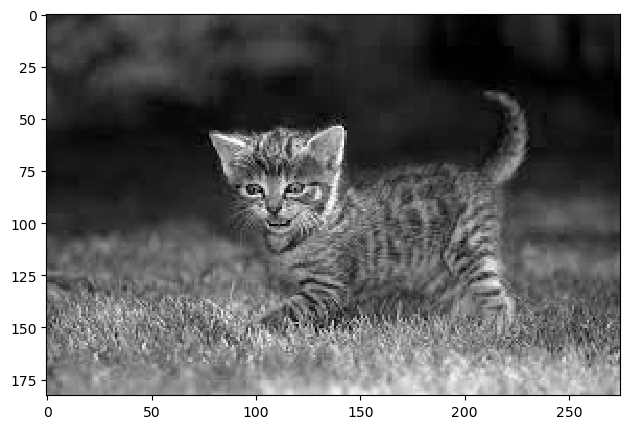

In [239]:
imshow(cat_image[:, :, 0])

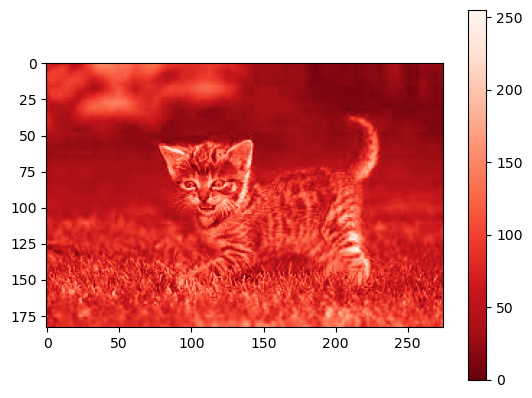

In [240]:
plt.imshow(cat_image[:, :, 2], cmap="Reds_r")
plt.colorbar()
plt.show()

slicing - вземаме част от изображението.

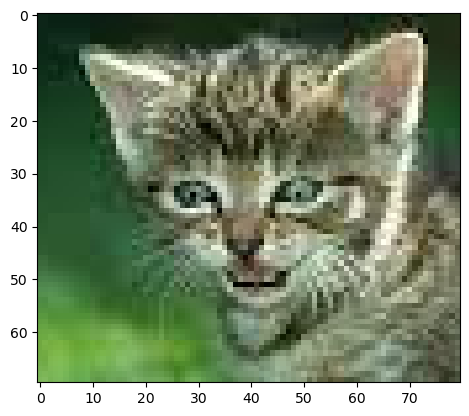

In [241]:
 plt.imshow(cat_image[50:120, 70:150])

можем да вземем през всеки втори ред, и през всяка втора колона - ще имаме 4 пъти по-малко данни

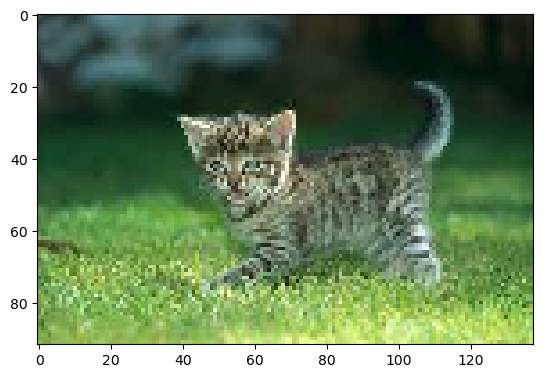

In [242]:
 plt.imshow(cat_image[::2, ::2])

In [243]:
cat_image.dtype

dtype('uint8')

solarization. Това което се случва, е че типа данни се препълва.

 ravel append-va каналите един след друг.

Искаме да направим хистограма на червения канал

In [244]:
cat_image[:,:, 0].ravel().shape

(50325,)

Това може да се направи и с reshape - на 1 колона с колкото дойдат редове.

In [245]:
cat_image[:,:, 0].reshape(-1, 1).shape

(50325, 1)

Това е по-правилния начин, защото при транспониране например само 1 ред пак си остава само 1 ред.

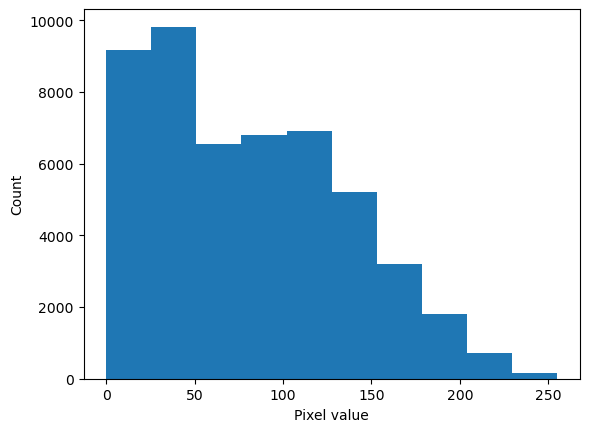

In [246]:
red_channel_for_histogram = cat_image[:, :, 0].ravel()

plt.hist(red_channel_for_histogram)

plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.show()

Слагаме толкова бинове, колкото стойности има.

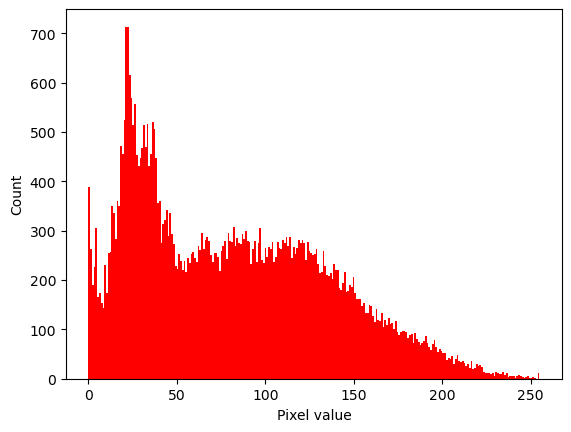

In [247]:
red_channel_for_histogram = cat_image[:, :, 0].ravel()

plt.hist(red_channel_for_histogram, bins=256, color = "Red")

plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.show()

Правим ги и за 3-те канала. Добавяме и прозрачност (alpha)

In [248]:
red_channel_for_histogram = cat_image[:,:,0].ravel()
green_channel_for_histogram = cat_image[:,:,1].ravel()
blue_channel_for_histogram = cat_image[:,:,2].ravel()

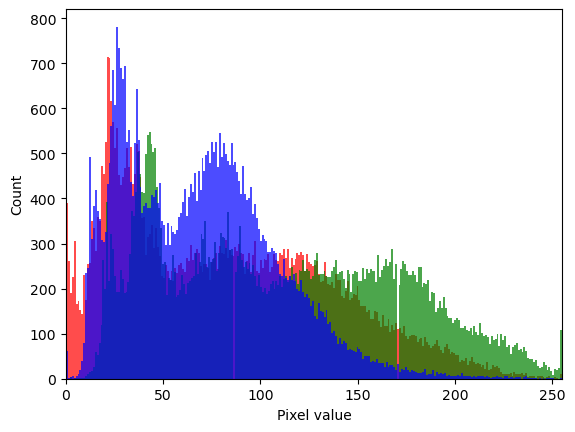

In [249]:
plt.hist(red_channel_for_histogram, bins=256, color="red", alpha=0.7)
plt.hist(green_channel_for_histogram, bins=256, color="green", alpha=0.7)
plt.hist(blue_channel_for_histogram, bins=256, color="blue", alpha=0.7)

plt.xlabel("Pixel value")
plt.ylabel("Count")

plt.xlim(0, 255)

plt.show()

Гледаме сега с по-светли пиксели

In [250]:
cat_image = imread("data/domestic-cat/dc (58).jpg")

In [251]:
cat_image.shape

(183, 275, 3)

когато имаме да зареждаме много изображения, не ги зареждаме наведнъж

In [252]:
all_domestic_cats = imread_collection("data/domestic-cat/*")

In [253]:
domestic_cats = list(all_domestic_cats)

In [254]:
len(domestic_cats)

64

In [255]:
(domestic_cats[16] == cat_image).all()

False

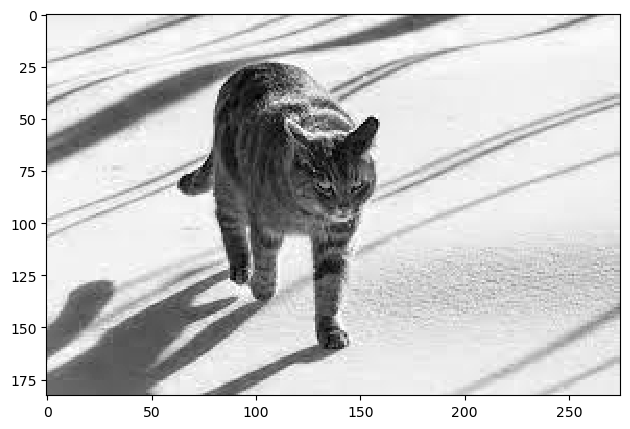

In [256]:
imshow(cat_image[:, :, 0])

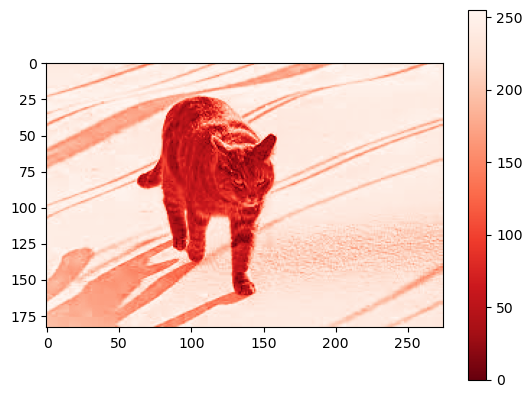

In [257]:
plt.imshow(cat_image[:, :, 2], cmap="Reds_r")
plt.colorbar()
plt.show()

slicing - вземаме част от изображението.

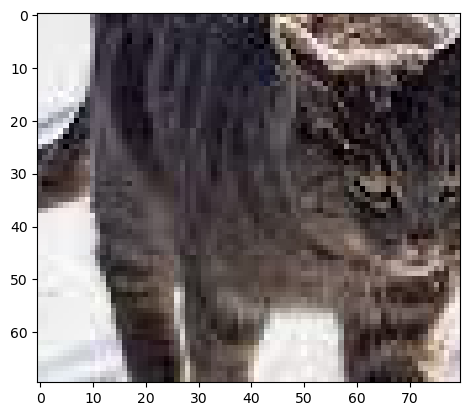

In [258]:
 plt.imshow(cat_image[50:120, 70:150])

можем да вземем през всеки втори ред, и през всяка втора колона - ще имаме 4 пъти по-малко данни

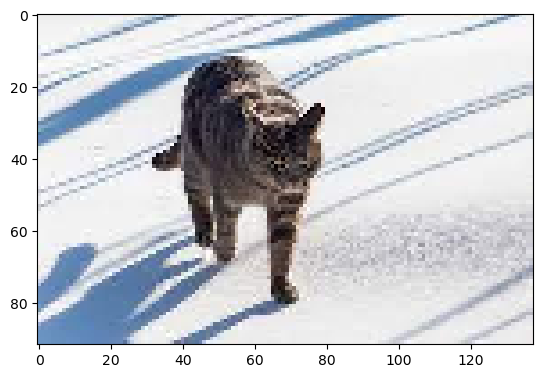

In [259]:
 plt.imshow(cat_image[::2, ::2])

In [260]:
cat_image.dtype

dtype('uint8')

solarization. Това което се случва, е че типа данни се препълва.

 ravel append-va каналите един след друг.

Искаме да направим хистограма на червения канал

In [261]:
cat_image[:,:, 0].ravel().shape

(50325,)

Това може да се направи и с reshape - на 1 колона с колкото дойдат редове.

In [262]:
cat_image[:,:, 0].reshape(-1, 1).shape

(50325, 1)

Това е по-правилния начин, защото при транспониране например само 1 ред пак си остава само 1 ред.

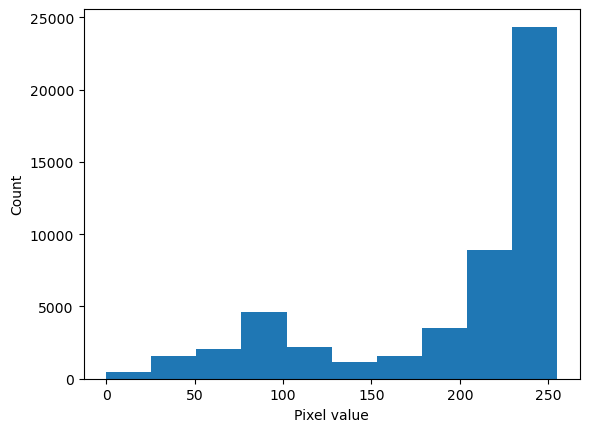

In [263]:
red_channel_for_histogram = cat_image[:, :, 0].ravel()

plt.hist(red_channel_for_histogram)

plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.show()

Слагаме толкова бинове, колкото стойности има.

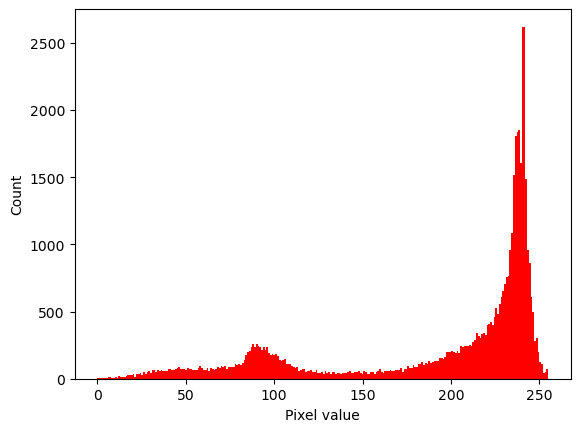

In [264]:
red_channel_for_histogram = cat_image[:, :, 0].ravel()

plt.hist(red_channel_for_histogram, bins=256, color = "Red")

plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.show()

Правим ги и за 3-те канала. Добавяме и прозрачност (alpha)

In [265]:
red_channel_for_histogram = cat_image[:,:,0].ravel()
green_channel_for_histogram = cat_image[:,:,1].ravel()
blue_channel_for_histogram = cat_image[:,:,2].ravel()

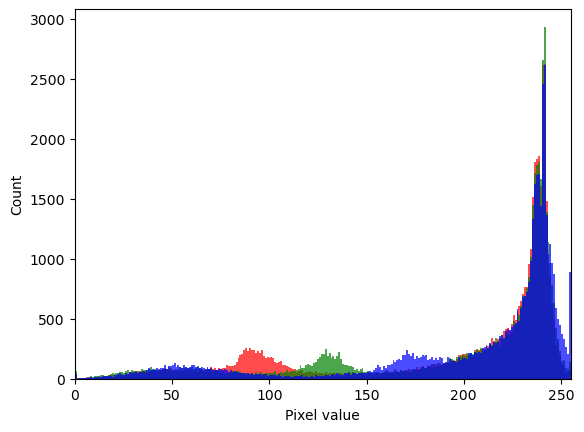

In [266]:
plt.hist(red_channel_for_histogram, bins=256, color="red", alpha=0.7)
plt.hist(green_channel_for_histogram, bins=256, color="green", alpha=0.7)
plt.hist(blue_channel_for_histogram, bins=256, color="blue", alpha=0.7)

plt.xlabel("Pixel value")
plt.ylabel("Count")

plt.xlim(0, 255)

plt.show()

Правим аритметика от изображенията. Ще използваме първоначалния image.

In [267]:
cat_image = imread("data/domestic-cat/dc (17).jpg")

Взимаме първия и втория пиксел и ги осредняваме.

маскиране

In [268]:
cat_image_masked = cat_image.copy()

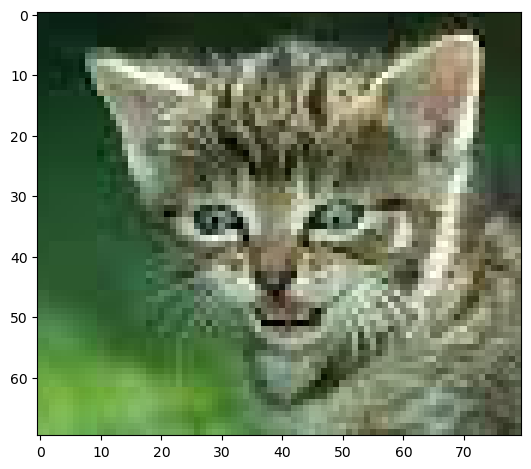

In [269]:
imshow(cat_image_masked[50:120, 70:150])

присвояваме на тази част 0

In [270]:
cat_image_masked[50:120, 70:150] = 0

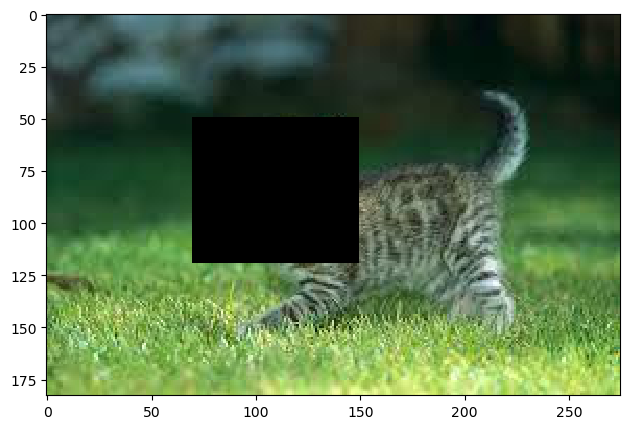

In [271]:
imshow(cat_image_masked)

Превръщаме диапазона на изображението от 0 до 1.

In [272]:
cat_image_normalized = cat_image / 255.0

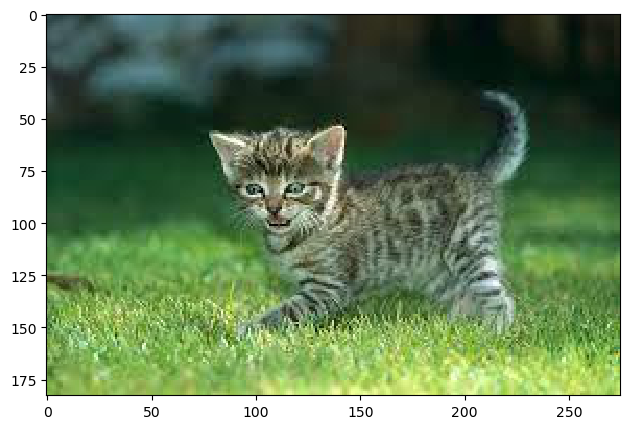

In [273]:
imshow(cat_image_normalized)

Нормализация е X - Min/Max - Min. Това се нарича min max нормализация. MinMaxScaler

Convolution - нещо като композиция на функции. cross-correlation. Получаваме 1 число като резултат от конволуцията.
https://www.youtube.com/watch?v=KuXjwB4LzSA. Valid convolution - не правя нищо, ако филтърът излиза от изображението.

За да не губим при прилагане на конволуция, може да увеличим изображението с толкова, с колкото ще загубим. - same convolution.

scipy има convolve2d. Добавяме го в импортите. Друго име за филтър е convolution kernel.

In [277]:
conv_filter = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
])

In [280]:
# Взимаме само 1 канал, защото и двата масива трябва да са 2х2
result = convolve2d(cat_image[:, :, 0], conv_filter, mode= "same")

In [281]:
result.min(), result.max()

(0, 1202)

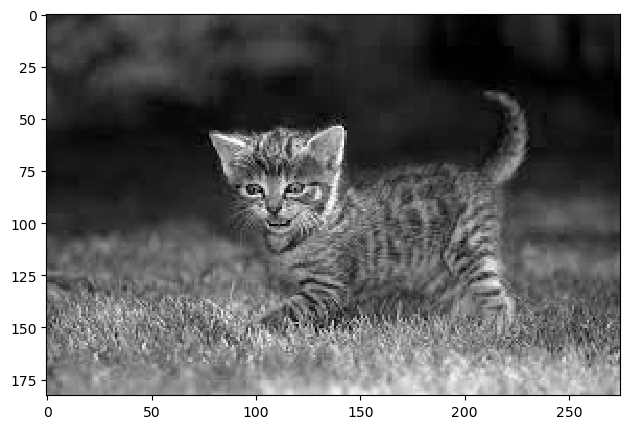

C:\Users\HP\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


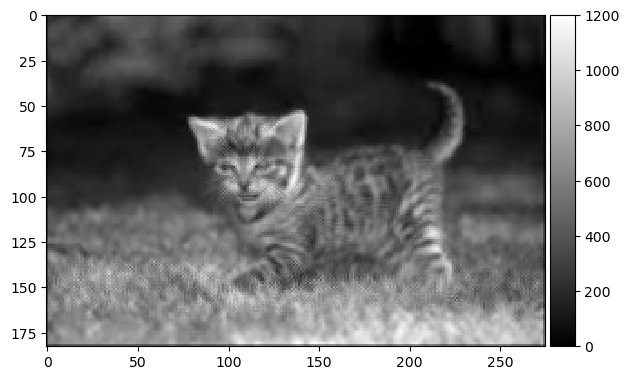

In [284]:
imshow(cat_image[:, :, 0], cmap = "gray")

plt.show()

imshow(result, cmap = "gray")
#Разлика между оргинала и филтъра.

ако имахме филтър само от единици, той ще усредни само околните пиксели. Нарича се mean filter.

Ако имаме по-голям филтър ше имаме и още по-голямо размазване.
Взимаме единичната матрица.

In [285]:
conv_filter = np.eye(5)

conv_filter

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [286]:
result = convolve2d(cat_image[:, :, 0], conv_filter, mode= "same")

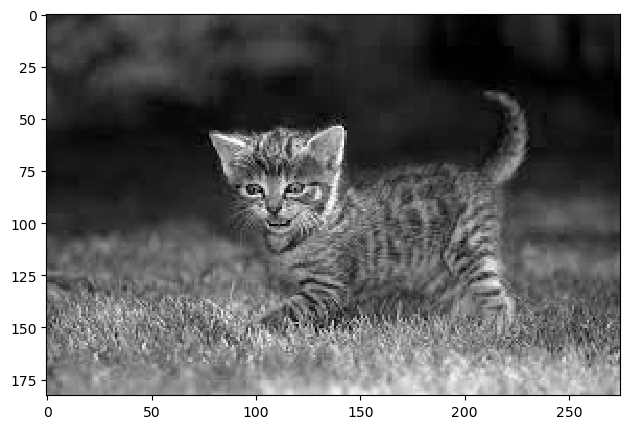

C:\Users\HP\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


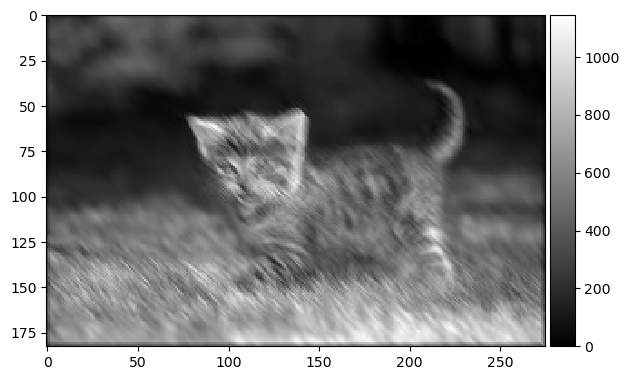

In [287]:
imshow(cat_image[:, :, 0], cmap = "gray")

plt.show()

imshow(result, cmap = "gray")

Има нещо като диагонали. Ще използваме обратния диагонал. Можем и да вземем стойности повече от 1. 

На всяка една стъпка прилагаме конволюции. Конволюцията е намерила една пространствена характеристика в изображението. Следващата след нея е взела тази характеристика и направила нещо друго с нея. Така и тука композицията води до много голяма усложняване. Композицията ни дава възможност да правим много по-сложни да речем разсъждение. Самото изображение, което сме получили, може да не се разпознава от нас, но е разпознаваемо от самите филтри. Така работят и конволюционните невронни мрежи. 

Друга операция е морфология - морфос е форма, и логия - наука, някакво обяснение. Ще търсим различни форми в изображението и ще се опитаме да акцентираме върху някои и да потиснем някои други. 
Имаме различни операции, които се прилагат по подобен начин, тъй като са свързани с някаква форма, им трябва някакъв структурен елемент. Това са пак матрици, ама са само от нули и единици (бинарна морфология). Тази матрица може да се помисли като нещо нарисувано. И оцветените пиксели ще определят структурния елемент. Например взимаме кръстче. Тоест пак представяме с матрица, но от нея ще ползваме само някои елементи. След това пак ще налагаме структурния елемент върху изображението, но при това налагане ще видим каква операция ще трябва да приложим.  Erosion, Dilation, Opening, Closing. са само основните. 

Нека като за начало имаме бинарно изображение и бинарен структурен елемент. Как се прави бинарно изображеие - трябва да има стойности само 0 и 255. 

In [ ]:
Взимаме средното.

In [299]:
cat_image_binary = cat_image.copy()
cat_image_binary.mean()

86.89094883258818

In [300]:
cat_image_binary[cat_image_binary < 87] = 0
cat_image_binary[cat_image_binary >= 87] = 255

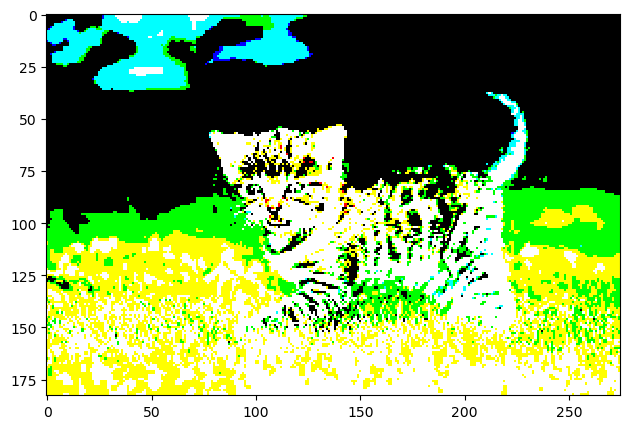

In [302]:
imshow(cat_image_binary, cmap = "gray")

plt.show()

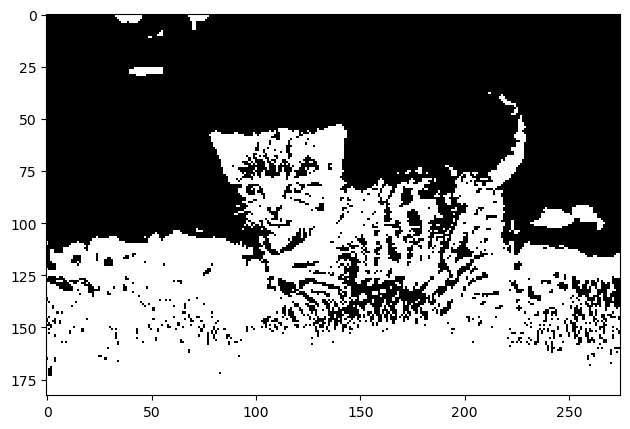

In [303]:
# Показваме само единия канал. То е бинарно изображение
imshow(cat_image_binary[:, :, 0], cmap = "gray")

plt.show()

Начина по който изглежда това изображение, показва случаи на erosion, или за closing. Имаме някои неща ни трябват и някои не. Някои неща са сработили и някои не. Например искаме да отделим котката от фона.

Ще правим маскиране. 
Избираме структурен елемент и го прилагаме във всички възможни места. (квадратчето)

Ерозия - Ако заменим 1 структурен елемент под минималния, това се нарича ерозия. Заместваме всичко под структурния елемент с минималната стойност, която наблюдаваме в неговото поле.
Там където структурния елемент попада на по-дебела линия, тя си остава. Накрая получаваме ерозирания вариант на първоначалните форми.
Искаме да разберем, че имаме един горе и един долу елемент.

Dilation - обратната ситуация - 2 обекта, които би трябвало да са 1. 

Opening and closing са отваряне и затваряне на дупки - двете последователни операции. Opening - erosion followed by dilation. Closing - dilation followed by erosion.

Skeletonization - превръщане на обекти в техните центрове. Много удобно когато искаме да търсим геометрични центроиди. Или когато търсим реки или кръвоносни съдове. 

За разлика от конволюциите морфологията няма добър начин да бъде описан алгоритъм с нея. За това се използва повече за научни цели. 

otsu - бинализиране на базата на хистограмата, но не задължително линейно. 
Може да намери подходящото място, което максимизира разликата между тъмно и светло. Получавме го със skimage filters.

In [305]:
threshold_otsu(cat_image[:, :, 0])

88

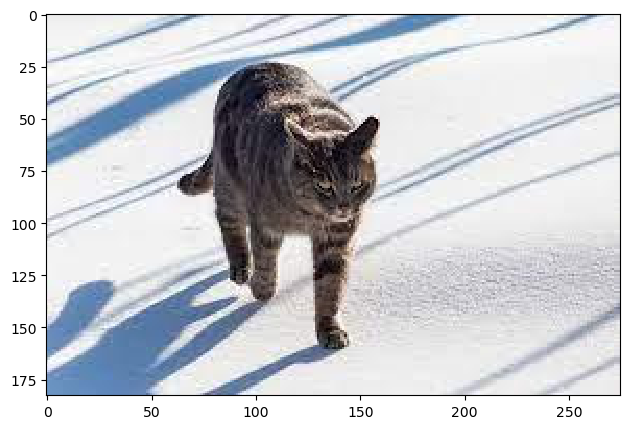

In [306]:
imshow(domestic_cats[57])

In [307]:
threshold_otsu(domestic_cats[57][:, :, 0])

156

In [309]:
cat_image_56_binary = domestic_cats[57].copy()[:, :, 0]

In [311]:
cat_image_56_binary[cat_image_56_binary <= 156] = 0
cat_image_56_binary[cat_image_56_binary > 156] = 255

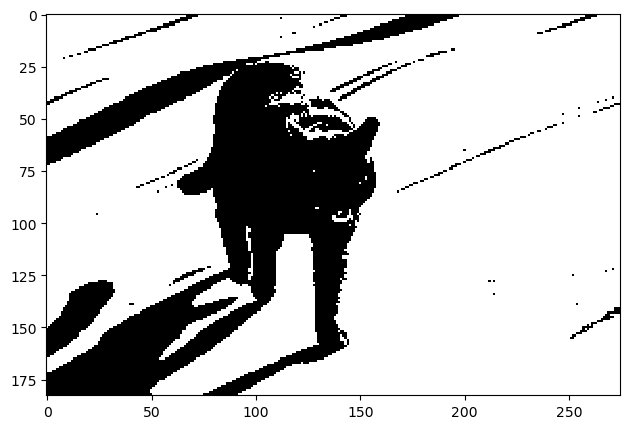

In [312]:
imshow(cat_image_56_binary)

Предното изображение имаше по-нисък контраст, което му позволи да има доста по-слабо отделяне на котката от фона.

Затваряме дупките черните вдясно. Линиите - прилагаме структурен елемент, който прилича на тях. 

Аритметика върху изображения - взимам едно изображение и му добавям друго.

In [313]:
arithmetic_result = domestic_cats[0].astype(int) + domestic_cats[1].astype(int)

In [314]:
arithmetic_result.min(), arithmetic_result.max()

(9, 499)

C:\Users\HP\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


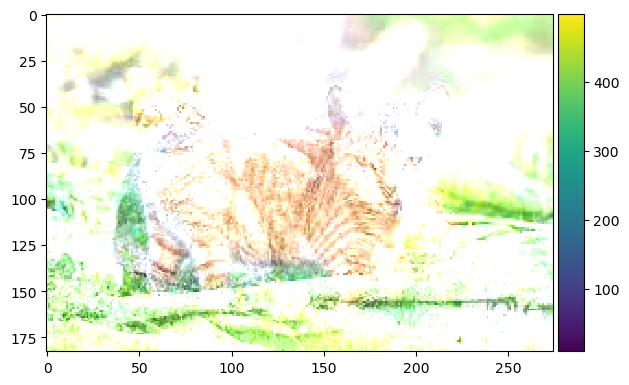

In [315]:
imshow(arithmetic_result)

In [316]:
arithmetic_result = 0.5 * domestic_cats[0].astype(int) + 0.5 * domestic_cats[1].astype(int)

In [317]:
arithmetic_result.min(), arithmetic_result.max()

(4.5, 249.5)

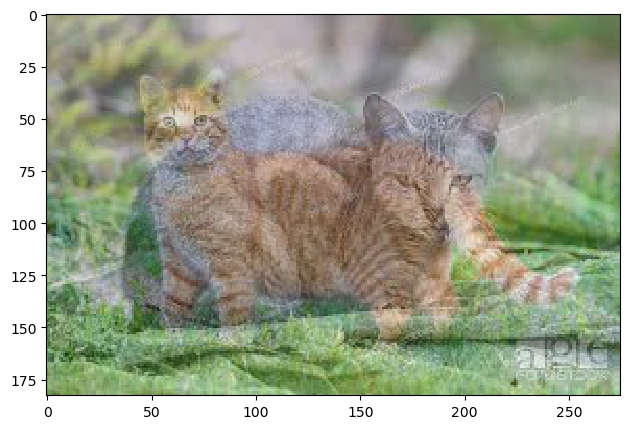

In [318]:
imshow(arithmetic_result.astype("uint8"))

Изваждането на изображения - много е популярно. 

image adding exposure astronomy. По-добре се усреднява по медианата, а не по средното аритметично. 

Имаме геометрични трансформации. Импорт на resize, rescale. resize e до какъв размер. rescale е колко пъти. Ако знаем финалния размер, resize ни трябва. 

In [320]:
resize(cat_image, (500, 500))

array([[[0.23966922, 0.33378686, 0.34163   ],
        [0.23795706, 0.33207471, 0.33991784],
        [0.2285402 , 0.32265784, 0.33050098],
        ...,
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235]],

       [[0.24550216, 0.3396198 , 0.34746294],
        [0.2435798 , 0.33769745, 0.34554059],
        [0.23300686, 0.32712451, 0.33496765],
        ...,
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235]],

       [[0.23753627, 0.33165392, 0.33949706],
        [0.23590098, 0.33001863, 0.33786176],
        [0.22690686, 0.32102451, 0.32886765],
        ...,
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235]],

       ...,

       [[0.52626814, 0.72626814, 0.31626814],
        [0.52368578, 0.72368578, 0.3144701 ],
        [0.50948284, 0

In [321]:
resize(cat_image, (500, 500)).shape

(500, 500, 3)

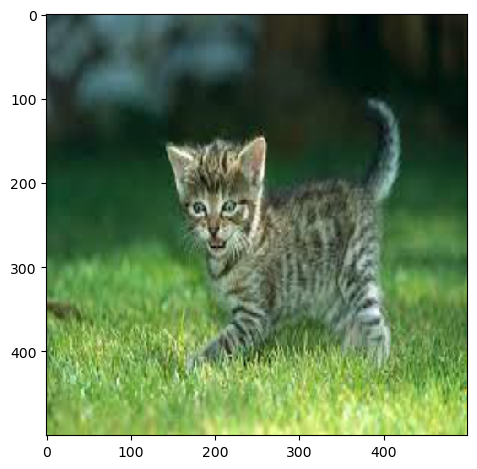

In [322]:
imshow(resize(cat_image, (500, 500)))

Удобно е да се докара сета до фиксирани размери, защото доста работят с фиксирани размери или aspect ratio.- съотношение дължина към ширина. 

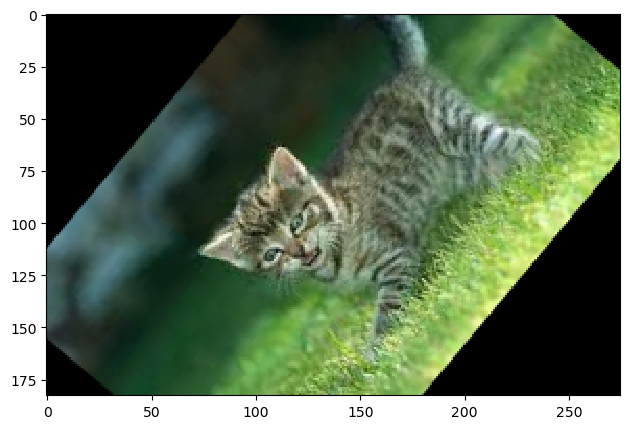

In [325]:
imshow(rotate(cat_image, 50))

При увеличаване и въртене на изображение има пиксели, която стойност трябва да измислим. Тази стойност се измисля. Тази стойност се измисля чрез интерполация и трябва да зададем алгоритъма за интерполация. Например е spline. линейна. 

Трансформация на Фурие: както има scipi fft, има fft2. Правим fft2. Това са други такива изображения. 

In [327]:
fft2(cat_image).shape

(183, 275, 3)

In [331]:
fft2(cat_image[:,:, 0]).shape #Взимаме червения канал.

(183, 275)

резултатът от това нещо е матрица от комплексни числа

In [332]:
fft2(cat_image[:,:, 0])

array([[ 4.09208900e+06      -0.j        ,
        -3.22262915e+05  -64604.31124402j,
         3.88325282e+03  +90480.71114919j, ...,
        -8.75023195e+04 +137436.10755022j,
         3.88325282e+03  -90480.71114919j,
        -3.22262915e+05  +64604.31124402j],
       [ 2.86641655e+05+1245546.77115593j,
         1.07931956e+05   -7246.46947157j,
        -1.41496730e+04 -230360.58851019j, ...,
         2.26238642e+04  -62615.35490966j,
        -6.52676210e+04  +44090.28518723j,
         2.62489123e+05 +164797.03227088j],
       [ 2.85417348e+05 +474722.29392137j,
        -2.40906903e+05  -36504.96299477j,
        -2.02547395e+04  +53681.15672406j, ...,
        -8.80019786e+04  +12475.77416205j,
         1.76889534e+05  -14798.97891804j,
        -2.85603060e+04 -244136.66619311j],
       ...,
       [ 8.33501581e+04 -330039.735409j  ,
         1.82263077e+05  -14936.59440176j,
        -5.66988017e+04  +67062.84336213j, ...,
        -5.79279353e+04  +10164.44829876j,
         3.51962893

тези числа имат големина и фаза.

In [333]:
fftshift(fft2(cat_image[:,:, 0]))

array([[  695.05324429 +356.66837233j,  1676.69391103 +378.02819553j,
          624.40351846 -728.4800673j , ...,
          183.17355755+1018.03806488j,  -234.33695557+1328.9075511j ,
         1988.12638703+1036.6435046j ],
       [  199.22044879+1879.20305796j,   173.97967035+1896.883612j  ,
         1691.18565781-1506.14372095j, ...,
        -2912.9629372 +1331.14722949j,   924.86236554 +822.07364332j,
        -1220.61717103 +453.41342251j],
       [-2119.9869582  +635.30723448j,  -302.8581566  -361.49818836j,
         -236.65535991+1838.66820455j, ...,
          374.62172957-1422.38519151j, -1484.25166642 -353.12743154j,
         -466.47266338 +683.95680034j],
       ...,
       [ -466.47266338 -683.95680034j, -1484.25166642 +353.12743154j,
          374.62172957+1422.38519151j, ...,
         -236.65535991-1838.66820455j,  -302.8581566  +361.49818836j,
        -2119.9869582  -635.30723448j],
       [-1220.61717103 -453.41342251j,   924.86236554 -822.07364332j,
        -2912.9629372 

Взимаме амплитудите

In [335]:
fft_amplitudes = np.abs(fftshift(fft2(cat_image[:,:, 0])))

C:\Users\HP\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


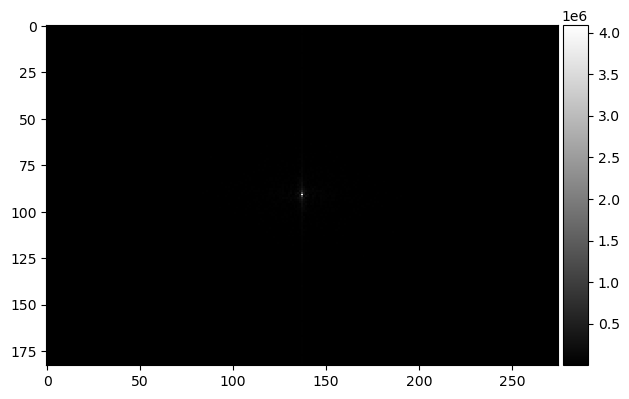

In [336]:
imshow(fft_amplitudes, cmap = "gray")

Това вече повече прилича на спектър. Много от компонентите са тъмни, затова може да покажем логаритъм.

C:\Users\HP\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


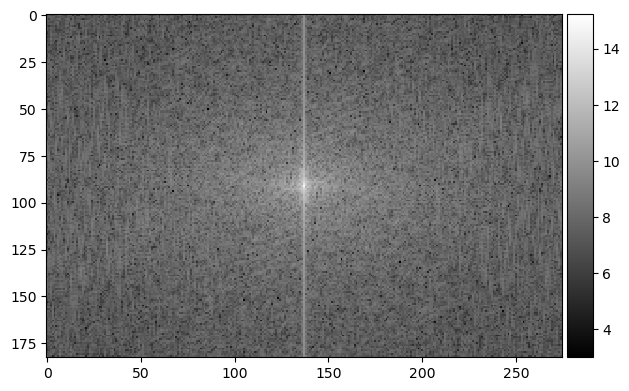

In [337]:
imshow(np.log(fft_amplitudes), cmap = "gray")

Самият спектър може да бъде използван като вход на някакъв алгоритъм. 

Как се използват невронни мрежи за изображения : Цялата работа, която вършим с изображенията, е от тях да получим feature-и. Виждаме много начин, а в начлото беше безумно неефективен. Трябва ни някакъв начин за таблици. 
За изображения се използват невронни мрежи. 

model = ResNet50()
Получаваме вектор с вероятности
Всеки алгоритъм има нужда от preprocessing.
Huggingface - имаме задача image classification. Демонстрираха ни res50.
Трябва ни feature extraction. От алгоритъма му сменяме задачата. 
Всяка невронна мрежа има множество слоеве. 
В някакъв момент конволюционните слоеве свършват.
Тоест може да вземем пред пред пред последния слой и да му видим какъв е output-а
Може да се опитаме да класифицираме векторите, защото те са точки в едно пространство.